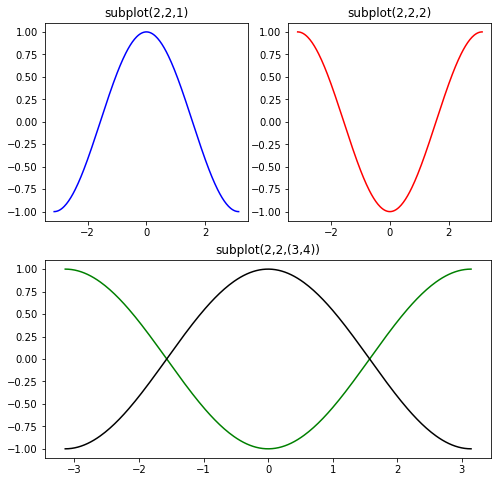

In [1]:
import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256)# 負pi 到正pi 間格取256
Y = np.cos(X)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(X, Y, color="blue")
plt.title('subplot(2,2,1)')
plt.subplot(2,2,2)
plt.plot(X, Y*-1, color="red")
plt.title('subplot(2,2,2)')
plt.subplot(2,2,(3,4))
plt.plot(X, Y*-1, color="green")
plt.plot(X, Y, color="black")
plt.title('subplot(2,2,(3,4))')
plt.show( )

# 分析與圖表顯示 1- 查看數值與型態
+ 讀取 salesv2.csv，並請將日期資料視為字串，方便之後的重新取樣。
+ 我們可以做一些快速分析，可再查看單價 (unit price)，可知道平均值與最大最小值。
+ 接著透過 dtypes 的輸出確保數字資料的格式是浮點數或整數。
+ describe 可快速查看count mean std min 等綜合資訊

In [2]:
import pandas as pd
sales=pd.read_csv("salesv2.csv",parse_dates=['date'])# 將date轉換成日期格式
print(sales.head( ))
print("----------1-----------")
print(sales.describe( ))
print("----------2-----------")
print(sales['unit price'].describe( ))
print("----------3-----------")
print(sales.dtypes)
print("----------4-----------")

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.

## 分析與圖表顯示 2- 分組與 Bar 顯示
+ 首先我們只取出 name、 ext price 與 date 三個欄位分析。
+ 為了理解購買模式，我們依據名稱 (name) 對所有客戶進行分組，再接著查看每個客戶的消費次數情況。
+　資料再以 Bar 方式顯示!

   account number                           name       sku category  quantity  \
0          296809                    Carroll PLC  QN-82852     Belt        13   
1           98022              Heidenreich-Bosco  MJ-21460    Shoes        19   
2          563905  Kerluke, Reilly and Bechtelar  AS-93055    Shirt        12   
3           93356                  Waters-Walker  AS-93055    Shirt         5   
4          659366                  Waelchi-Fahey  AS-93055    Shirt        18   

   unit price  ext price                date  
0       44.48     578.24 2014-09-27 07:13:03  
1       53.62    1018.78 2014-07-29 02:10:44  
2       24.16     289.92 2014-03-01 10:51:24  
3       82.68     413.40 2013-11-17 20:41:11  
4       99.64    1793.52 2014-01-03 08:14:27  
----------1-----------
----------2-----------
----------3-----------
----------4-----------
                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1          

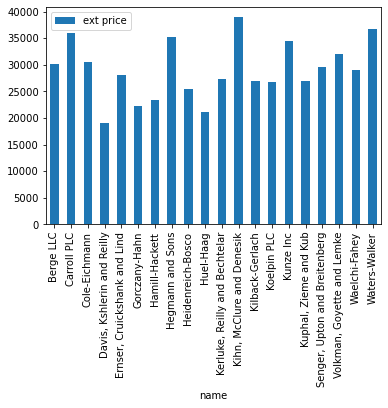

In [3]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals)
my_plot = sales_totals.plot(kind='bar')
plt.show( )

## 分析與圖表顯示 3- Bar 修改
+ 這張圖表再做一些調整，我們可以使它更有影響力：
  + 資料進行排序
  + 刪除圖例
  + 添加標題
  + 標記軸
+ 圖表將可顯示最大客戶與最小客戶之間差異。

                            name  ext price                date
0                    Carroll PLC     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar     289.92 2014-03-01 10:51:24
3                  Waters-Walker     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    1793.52 2014-01-03 08:14:27
----------5-----------
name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upto

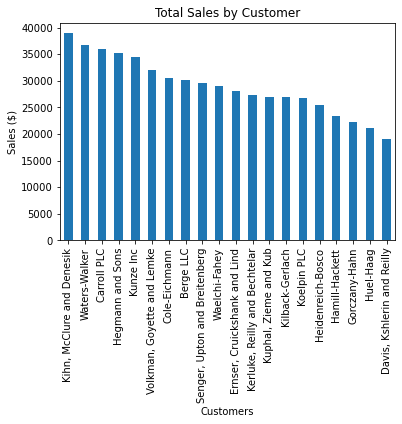

In [4]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','ext price','date']]
print(customers.head( ))
print("----------5-----------")
customer_group = customers.groupby('name')
print(customer_group.size( ))
print("----------6-----------")
sales_totals = customer_group.sum( )
print(sales_totals.sort_values(by='ext price',ascending=False))
#my_plot = sales_totals.plot(kind='bar')
# ext price高的排在前面
my_plot = sales_totals.sort_values(by='ext price',ascending=False).plot(
    kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")
plt.show( )

## 分析與圖表顯示 4- 堆疊長條圖
+ 再請試著將銷售部分以類別細分。
+ 再將類別分組後的資料以堆疊長條圖方式顯示。

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

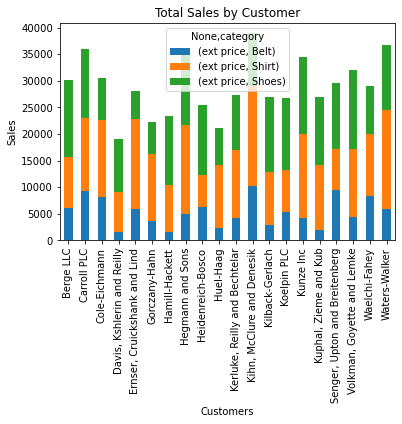

In [5]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head())
print("===================================")
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head())
print("===================================")
print(category_group.unstack().head( ))
print("===================================")
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
plt.show()

## 分析與圖表顯示 5- 堆疊長條圖調整
+ 圖例於視覺上造成阻礙。
+ 堆疊長條圖顯示方式略作調整。
+ loc編號
|功能         |編號|
|-------------|-----|
|最好(右上)預設| 0  |
|右上方	   | 1   |
|左上	       | 2|
|左下角	      | 3|
|右下	       | 4|
|對	        | 5|
|中左	       | 6|
|中右	       | 7|
|下中心	      | 8|
|上中	       | 9|
|中央	       | 10|

                            name category  ext price                date
0                    Carroll PLC     Belt     578.24 2014-09-27 07:13:03
1              Heidenreich-Bosco    Shoes    1018.78 2014-07-29 02:10:44
2  Kerluke, Reilly and Bechtelar    Shirt     289.92 2014-03-01 10:51:24
3                  Waters-Walker    Shirt     413.40 2013-11-17 20:41:11
4                  Waelchi-Fahey    Shirt    1793.52 2014-01-03 08:14:27
                      ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61
                             ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  145

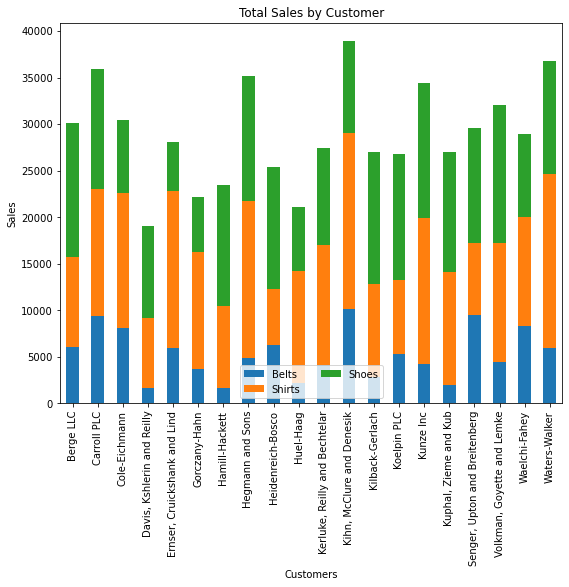

In [11]:
import matplotlib.pyplot as plt
import pandasplot009a
customers = pandasplot009a.sales[['name','category','ext price','date']]
print(customers.head( ))
category_group=customers.groupby(['name','category']).sum( )
print(category_group.head( ))
print(category_group.unstack( ).head( ))
my_plot = category_group.unstack( ).plot(
    kind='bar',stacked=True,title="Total Sales by Customer",
    figsize=(9, 7))#改變圖片大小
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Belts","Shirts","Shoes"],
               loc=8,ncol=2)# loc上中 顯示3組 ncol=2 美欄顯示2組
plt.show( )

## 設計直方圖
+ 已經知道最大的客戶以及他們如何購買產品，我們可能希望更詳細地了解購買模式。
+ 讓我們再看一下數據並試著看看個人購買量有多大。
+ 直方圖允許我們將購買分組在一起，以便我們可以看到客戶交易的大小。
+ 我們可以建立一個包含 20 個資料的直方圖來顯示購買模式的分佈。

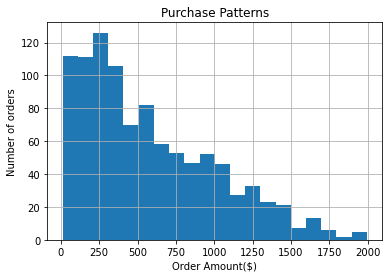

In [14]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price']]
purchase_plot = purchase_patterns['ext price'].hist(bins=20)#分成20份
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")#訂單金額
purchase_plot.set_ylabel("Number of orders")#此金額的訂單筆數
plt.show( )

## 日期重新採樣
+ 讓我們從另外一個角度，查看銷售額隨著時間的推移是否會更忙。
+ 我們按日期分析資料，我們需要使用日期列作為索引  。
+ 我們想要按月份查看資料，我們可以重新採樣並總結。
+ 我們可以使用 "M" 作為重新採樣的時間段，代表資料應在月底重新採樣。

   ext price                date
0     578.24 2014-09-27 07:13:03
1    1018.78 2014-07-29 02:10:44
2     289.92 2014-03-01 10:51:24
3     413.40 2013-11-17 20:41:11
4    1793.52 2014-01-03 08:14:27
============================date======================
                     ext price
date                          
2014-09-27 07:13:03     578.24
2014-07-29 02:10:44    1018.78
2014-03-01 10:51:24     289.92
2013-11-17 20:41:11     413.40
2014-01-03 08:14:27    1793.52
==========================M========================
            ext price
date                 
2013-10-31   14085.27
2013-11-30   44932.78
2013-12-31   57752.23
2014-01-31   53161.35
2014-02-28   51783.56


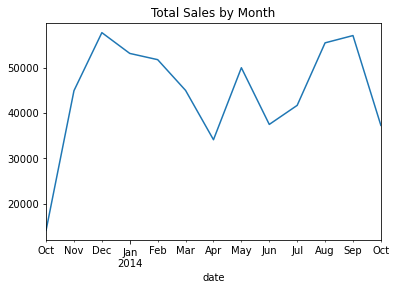

In [15]:
import matplotlib.pyplot as plt
import pandasplot009a
purchase_patterns = pandasplot009a.sales[['ext price','date']]
print(purchase_patterns.head( ))
print("============================date======================")
purchase_patterns = purchase_patterns.set_index('date')
print(purchase_patterns.head( ))
print("==========================M========================")
print(purchase_patterns.resample('M').sum().head( ))
print("==================================================")
purchase_plot = purchase_patterns.resample('M').sum().plot(# 每個月的銷售額
    title="Total Sales by Month",legend=None)
plt.show( )
fig = purchase_plot.get_figure( )
fig.savefig("total-sales.png")

# 作業

           週六       週日
路線方向                  
1北向   4684830  4980642
1南向   5149661  4809308
3北向   2898974  3554098
3南向   3534621  3272488
<class 'matplotlib.axes._subplots.AxesSubplot'>


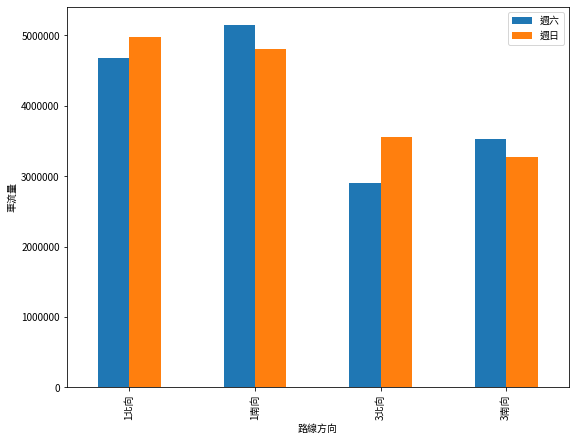

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# 將字體換成Noto Serif
plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
# 修復負號顯示問題
plt.rcParams['axes.unicode_minus']=False

data = pd.read_csv('HW16__Data.csv')
data['路線方向']=data['路線方向'].map(lambda x:x[1:4])
data = data[data['路線方向'].isin(['1南向','1北向','3北向','3南向'])]
gData = data.groupby('路線方向')
gData = gData[['週六','週日']].sum()
print(gData)
#gData = gData[(gData['週六'] > 2000000) & (gData['週日'] > 2000000)]
gData =gData.query("週六 > 2000000 & 週日 > 2000000")
my_plot = gData.plot(kind='bar',figsize=(9, 7))
print(type(my_plot))
#移除科學記號
my_plot.ticklabel_format(axis='y', style='plain', useOffset=False)
my_plot.set_ylabel("車流量")
plt.show()